# Example: Unsupervised learning ($k$-means)


The purpose of this example is to get familiar with unsupervised learning with the *$k$-means* algorithm. This example is an application of a $k$-means clustering on iris dataset, available in the 'sklearn.datasets' module.

For this tutorial, we will need the following libraries:

In [1]:
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
import os
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from matplotlib.image import imread  
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## 1) Fit $k$-means to a dataset

We start by loading the 'iris' data, with the `load_iris()` function contained in the `datasets` module. Here, we need only to use the data of predictors ($X$), as no target variable ($y$) is required in clustering.

In [2]:
# load data
iris = datasets.load_iris()

# store predictors in X
X = iris.data

print(iris.feature_names)
print(X.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


We can check the distribution of the predictor features.

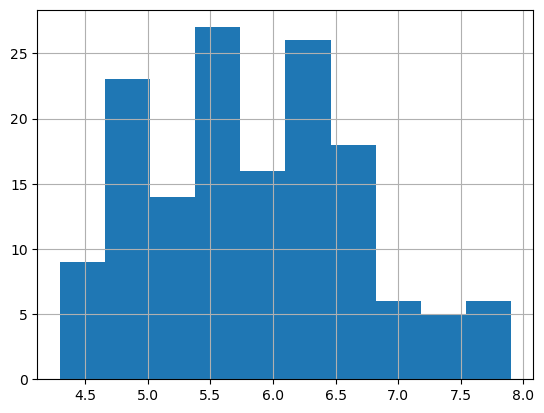

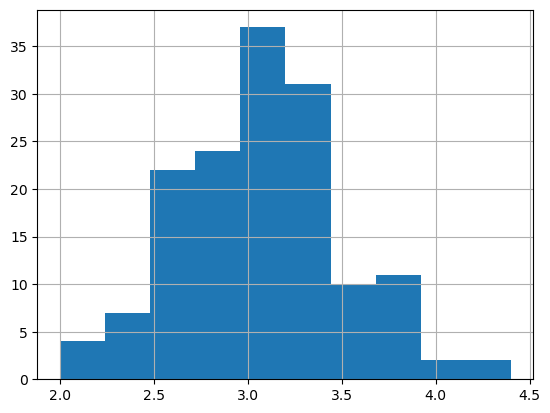

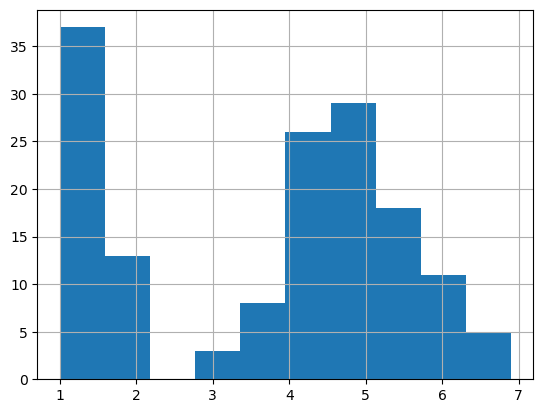

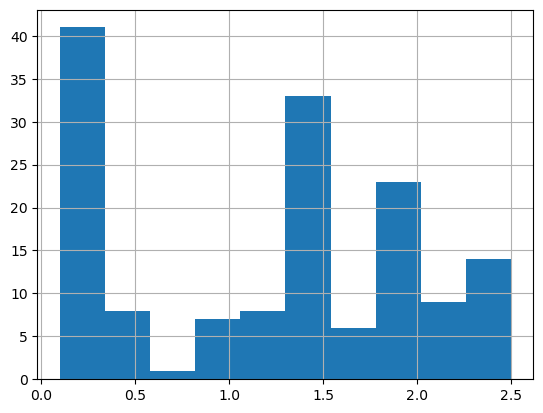

In [3]:
df = pd.DataFrame(X, columns = iris.feature_names)
for i in iris.feature_names:
    df[i].hist()
    plt.show()

We consider now the iris dataset as an **unlabeled dataset** represented below: we can see different subgroups of data points. The $k$-means algorithm will take a few iterations to converge. 

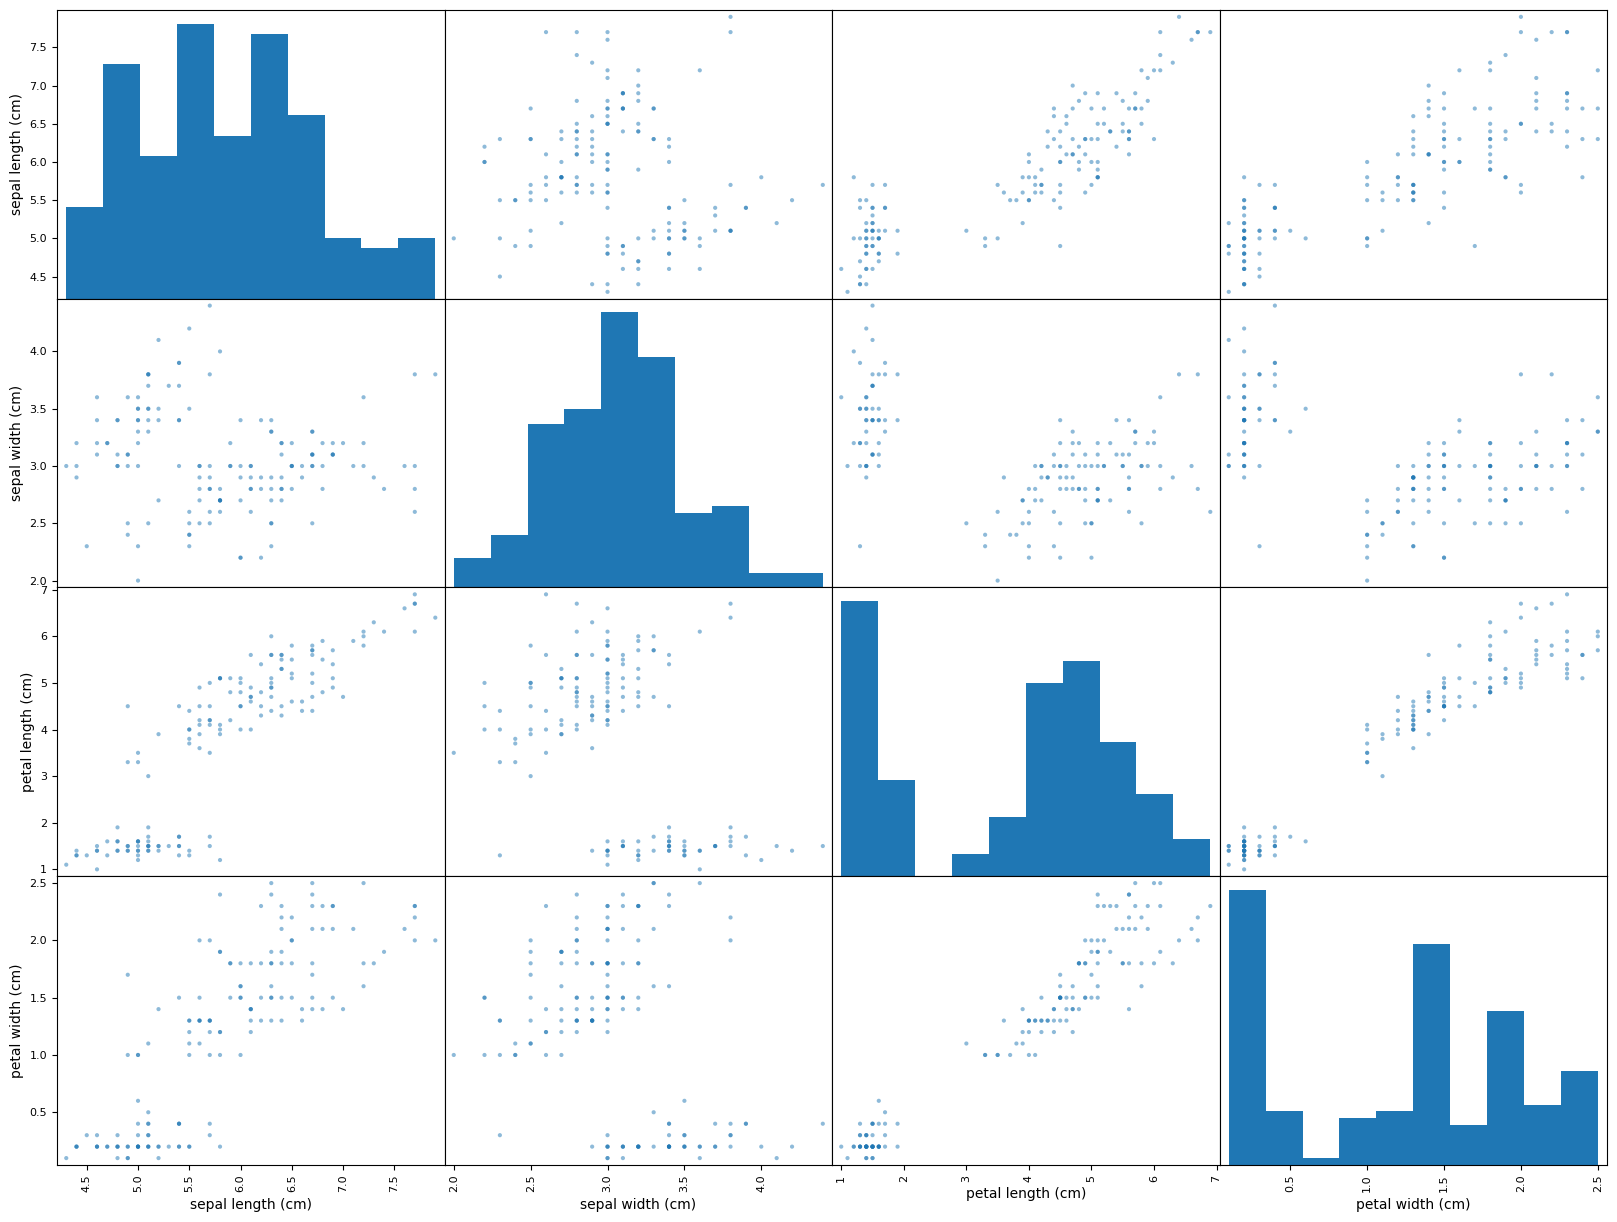

In [4]:
pd.plotting.scatter_matrix(df, figsize = (20,15))
plt.show()

Now we train a $k$-Means clustering algorithm on this datasetin order to find each subgroup’s center and assign each observation to the closest subgroup:

In [5]:
k = 4 # here w know the true number of clusters
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X) # returns the cluster label of each observation

print(y_pred)

C:\Users\michel.p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\michel.p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 3 3 3 2 3 3 3 0
 0 3 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 0 3 3 3 0 3 3 3 0 3 3 3 0 0
 3 0]


By default, the cluster labels are integers, from $0$ to $k-1$. The same scatterplot can be visualized, using the cluster label as color index.

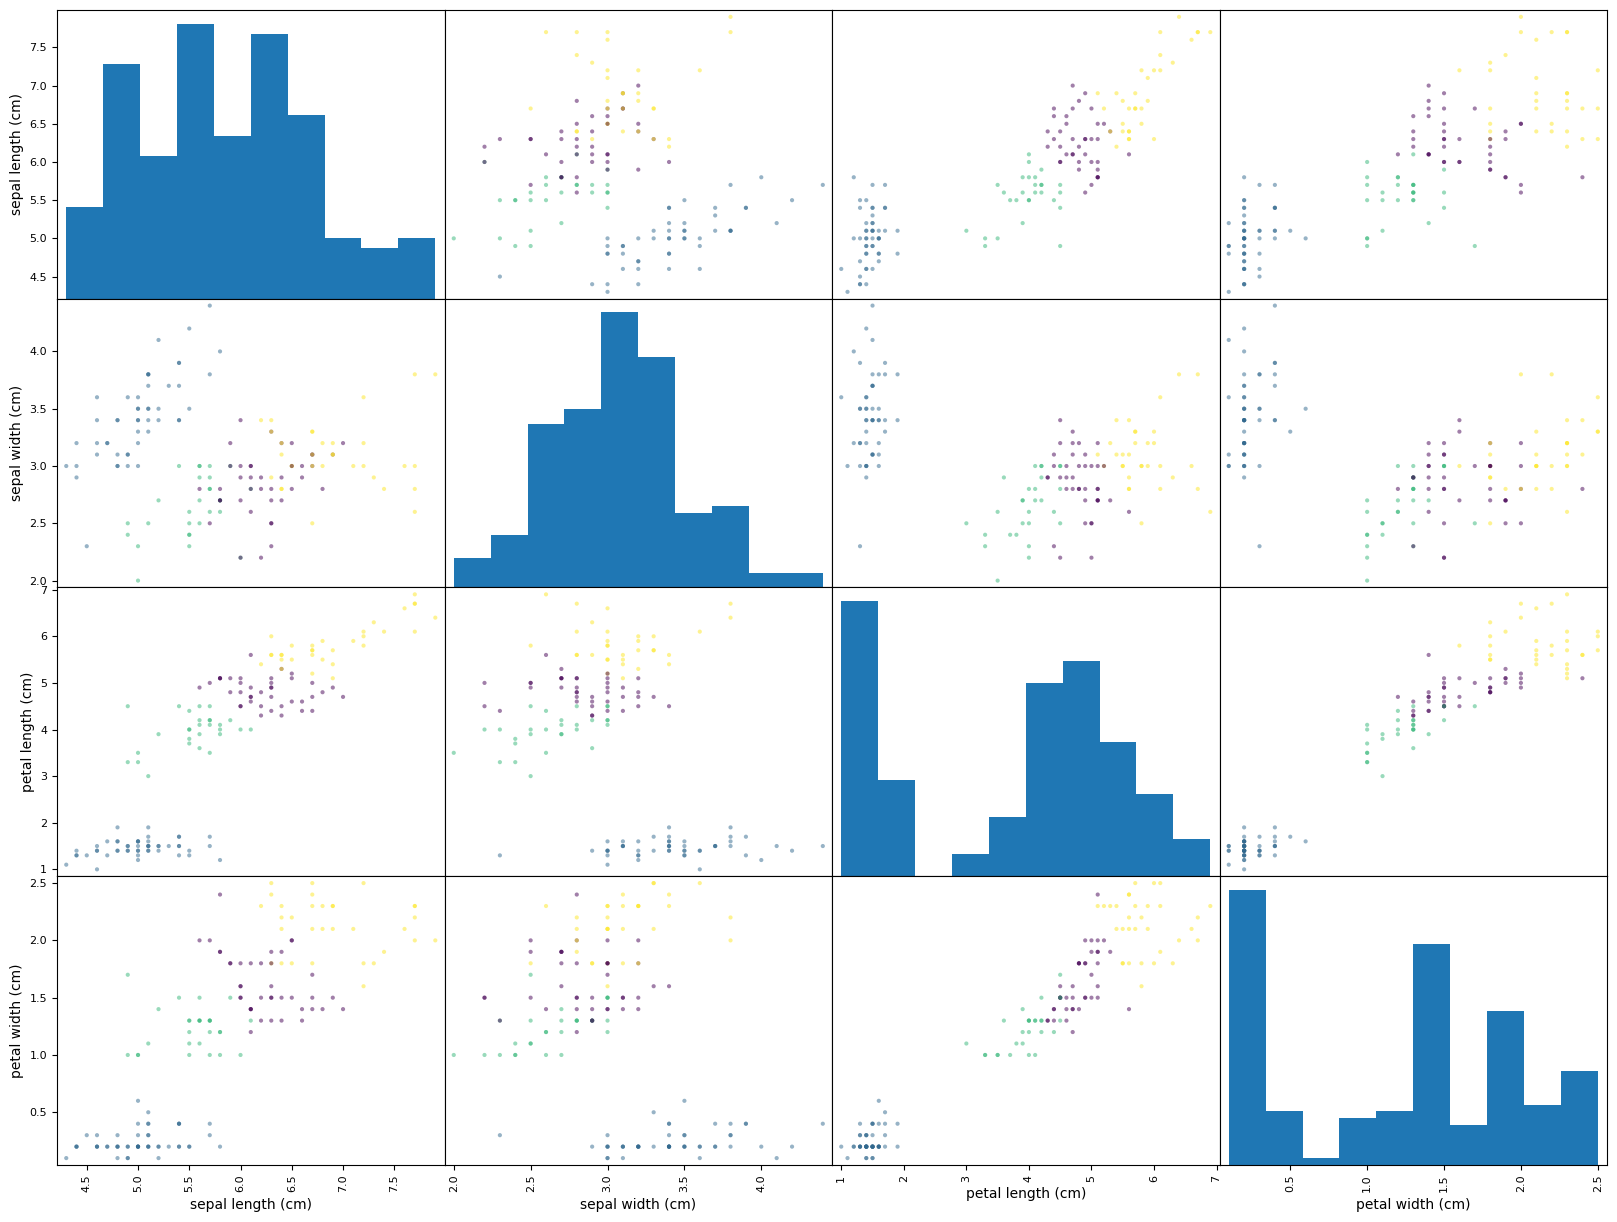

In [6]:
pd.plotting.scatter_matrix(df, figsize = (20,15), c = y_pred)
plt.show()

The object `labels_` also contains the cluster labels.

In [7]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 3 3 3 2 3 3 3 0
 0 3 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 0 3 3 3 0 3 3 3 0 3 3 3 0 0
 3 0]


The cooordinates of the 3 clusters (centroids) can obtained as follows:

In [8]:
kmeans.cluster_centers_

array([[6.2525    , 2.855     , 4.815     , 1.625     ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ]])

We can also predict the cluster label of new observations.

In [9]:
X_new = np.array([[5.5, 3.2, 5.3, 2.5], 
                  [5.6, 3.3, 1.4, 0.5], 
                  [6.4, 4.8, 4.2, 3.6],
                  [4.9, 2.5, 1.5, 2.8], 
                  [5.4, 2.8, 2.2, 5.6]]) # 5 new observations

kmeans.predict(X_new)

array([0, 1, 3, 1, 2])

To convert the prediction from a hard clustering solution (an observation is assigned to only one cluster) to a soft clustering (an obervation corresponds to a distribution of distances)... the following could be used for dimension reduction purposes...

In [10]:
kmeans.transform(X_new)

array([[1.29851117, 4.48405843, 1.93123493, 1.56211558],
       [3.68125403, 0.6614983 , 2.74480493, 4.91917982],
       [2.84317274, 4.75095569, 3.33440246, 2.83232768],
       [3.78485551, 2.71970219, 2.99040558, 4.8736747 ],
       [4.83411122, 5.45523418, 4.71740968, 5.26398899]])

## 2) Tuning $k$-means

We can specify starting values to initialize the centroids, i.e. we can choose the coordinates of the centroids instead of generating them randomly. In this case, we will create an array containing the coorinates of the centroids, using the `init` argument (actually they correpond to the cluster labels obtained at the previous run of $k$-means) and `n_init=1` (very important).

In [11]:
init_values = np.array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
               [5.006     , 3.428     , 1.462     , 0.246     ],
               [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

kmeans = KMeans(n_clusters=3, init=init_values, n_init=1)

`n_init` is an argument that allows to repeat the initialization of the centroids several times, and to select as starting values the coordinates that minimize the within-cluster inertia. This quantity (inertia) can be obtained as follows:

In [12]:
kmeans.fit(X) # fit the model
kmeans.inertia_ # compute final inertia

C:\Users\michel.p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


78.851441426146

As usual, the `score()` function can also be used to get this quantity, but it is given as a negative number (same as negative MSE, see th example about multivariate regression).

In [13]:
kmeans.score(X)

-78.85144142614601

Another argument of interest is `algorithm`, see the help of $k$-means, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.

To go further... http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf ($k$-means++)

https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf (Elkan's method)

https://www.ra.ethz.ch/CDstore/www2010/www/p1177.pdf (Mini-batch $k$-means)

In [14]:
# fit a mini-batch k-means
minibatch_kmeans = MiniBatchKMeans(n_clusters=3)
minibatch_kmeans.fit(X)

C:\Users\michel.p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\michel.p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=3)

In [15]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## 3) Choose the number of clusters

Here, we have fixed the number of clusters $k=3$ as it was known as the true number of clusters. Generally, $k$ has to be tuned as any other hyperparameter... let's try the "elbow" criterion, we will use inertia and the silhouette score as performance measures.

For a given observation $x^{(i)}$, the silhoutte score is:

$$ s(i) = \frac{b(i)-a(i)}{\max{(a(i),b(i))}} $$

where $a(i)$ is the mean distance to the other observations in the same cluster:

$$ a(i) = \frac{1}{\#\{j | c^{(j)}=c^{(i)}\}} \sum_{\{j | c^{(j)}=c^{(i)}\}} ||x^{(i)}-x^{(j)}||$$

and $b(i)$ is the mean distance to the observations of the closest cluster:

$$ b(i) = \min_{k \ne c^{(i)}}{\frac{1}{\#\{j | c^{(j)}=k\}}\sum_{\{j | c^{(j)}=k\}}} ||x^{(i)}-x^{(j)}|| $$

The silhouette score can be computed using the `silhouette_score()` function, averaged on all the observations in the dataset:

$$ \text{Silhouette score} = \frac{1}{m}\sum_{i=1}^m s(i)$$

In [16]:
silhouette_score(X, kmeans.labels_)

0.5528190123564095

The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the observation is well assigned to its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

The goal is now to vary the value of $k$, in order to find the optimal number of clusters, with respect to the inertia and the silhouette coefficient.

C:\Users\michel.p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\michel.p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\michel.p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\michel.p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

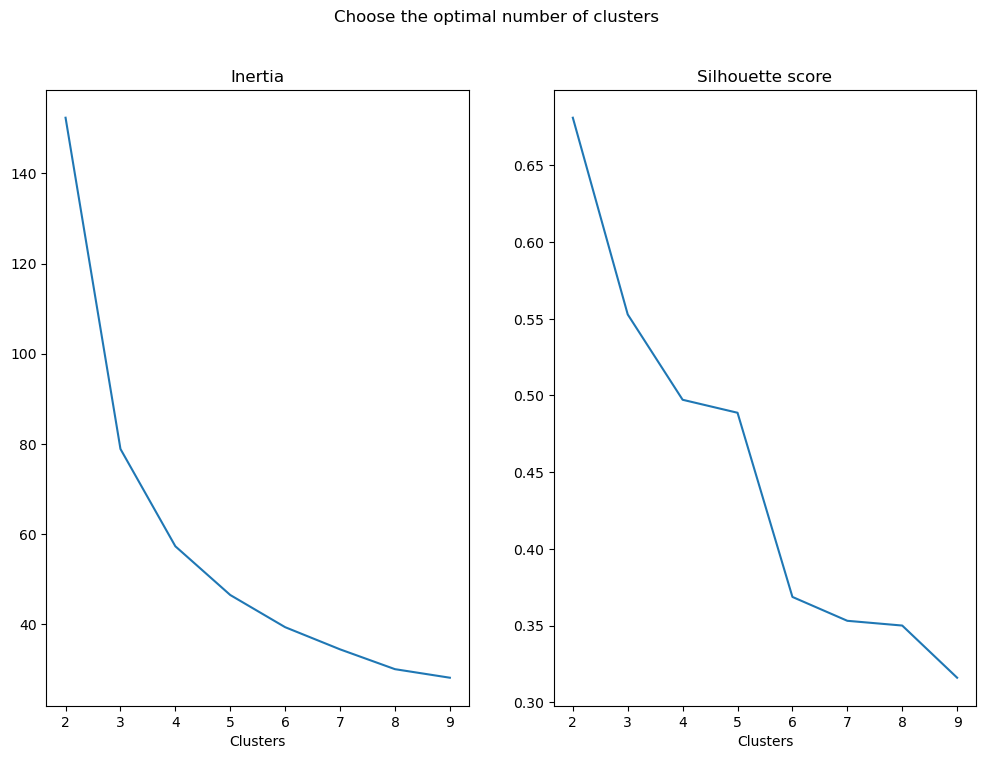

In [18]:
K = range(2,10)
Inertia = []
Silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X) 
    Inertia.append(kmeans.inertia_)
    Silhouette.append(silhouette_score(X, kmeans.labels_))
   
fig, axs = plt.subplots(1,2, figsize = (12,8))
fig.suptitle('Choose the optimal number of clusters')
axs[0].plot(K, Inertia)
axs[0].set_title("Inertia")
axs[0].set(xlabel='Clusters')
axs[1].plot(K, Silhouette)
axs[1].set_title("Silhouette score")
axs[1].set(xlabel='Clusters')
plt.show()

## 4) Application: image color segmentation

In a color segmentation problem, pixels are assigned to the same segment (cluster) if they have a similar color. In some applications, this may be sufficient to extract the information of interest. For example, if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.

We will use the image `coccinelle.jpg` in this example.

(1000, 1600, 3)


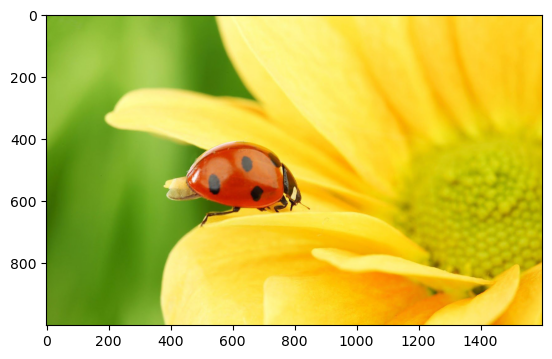

In [19]:
image = imread(os.path.join("..","datasets","img","coccinelle.jpg"))
print(image.shape)
plt.imshow(image)
plt.show()

As we can see, the image is a 3D array. The first dimension corresponds to the height; the second is the width; and the third is the number of color channels (RGB). For each pixel there is a $1000 \times 1600$ values measuring the intensities of red, green, and blue, each between 0 and 255.

The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using $k$-means:

In [21]:
X = image.reshape(1000*1600, 3)
print(X.shape)
kmeans = KMeans(n_clusters=8, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)/255

(1600000, 3)


In [22]:
kmeans.cluster_centers_

array([[144.75161676, 187.15221451,  59.39464306],
       [252.95045863, 229.40590633,  83.97576316],
       [ 89.44029431, 140.12606881,  20.2305573 ],
       [247.05230765, 186.561082  ,   6.18021634],
       [196.3876725 , 185.93380102,   3.47656348],
       [199.08450287,  81.37243073,  26.44768316],
       [253.5037853 , 241.2788964 , 130.63253864],
       [252.86370329, 213.13685919,  40.94424242]])

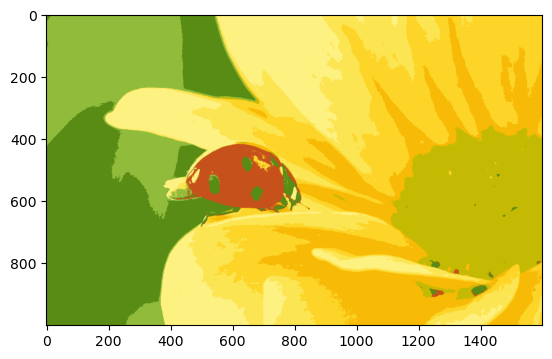

In [23]:
plt.imshow(segmented_img)
plt.show()

## 5) Clustering for preprocessing the data

Clustering can be used more generally for preprocessing step before a supervised learning algorithm. As an example of using clustering for preprocessing, let’s consider the digits dataset. First, load the dataset and split it into a training set and a test set:

In [24]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [25]:
print(X_digits.shape)
print(X_train.shape)

(1797, 64)
(1347, 64)


Let's fit a simple multiclass classifier (OVR classifier) with the `LogisticRegression()` function, and compute the accuracy:

In [26]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9644444444444444

This is the baseline model (accuracy: 96.4%).

Can we do better by using $k$-means as a preprocessing step ? 

Here, we create a pipeline that cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters (similar to `transform()`), then apply a Logistic Regression model:

In [ ]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, n_init=10)),
    ("log_reg", LogisticRegression(max_iter = 10000)),
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

Compared to the baseline model, the error rate was reduced. The clustering step has the effect to reduce the dataset’s dimension (here from 64 to 50 dimensions), but the performance boost comes mostly from the fact that the transformed dataset is more likely to be linearly separable than the original dataset, and therefore it is much easier to well classify with Logistic Regression.

Here, we chose the number of clusters $k$ arbitrarily. Here the best value of $k$ is simply the one that results in the best classification performance during cross-validation. We can use `GridSearchCV` to find the optimal number of clusters:

In [ ]:
param_grid = dict(kmeans__n_clusters=range(2, 10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

In [ ]:
print(grid_clf.best_params_)
grid_clf.score(X_test, y_test)

What do you observe ?